In [17]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Transformar em um vetor 1D
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [14]:
# Criação e treinamento do modelo de Random
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train) 
y_pred = rf_classifier.predict(X_test_scaled)

In [15]:
# AVALIAÇÃO DO MODELO 
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [16]:
print(f"Acurácia do Modelo: {accuracy}")
print(report)

Acurácia do Modelo: 0.9707602339181286
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [18]:
from sklearn.metrics import confusion_matrix

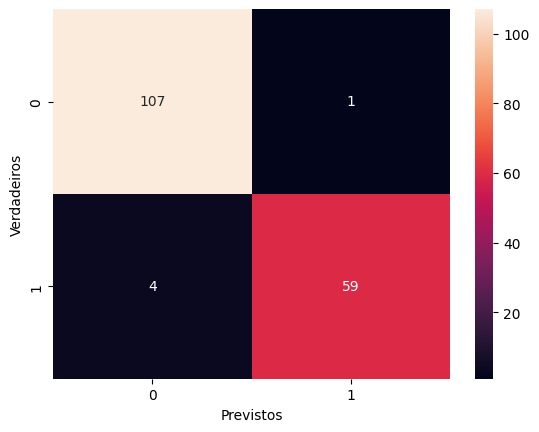

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Verdadeiros')
plt.xlabel('Previstos')
plt.show()